# Seller EDA
1. Seller Adress
2. Seller ID

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

X_dataframe = pd.read_csv("../data/X_dataframe.csv")

# Seller Address

In [2]:
X_dataframe["seller_address"].describe()

count                                                 90000
unique                                                 3803
top       {'country': {'name': 'Argentina', 'id': 'AR'},...
freq                                                   3693
Name: seller_address, dtype: object

In [3]:
X_dataframe["seller_address"].isna().sum() + X_dataframe["seller_address"].isnull().sum()

np.int64(0)

#### 💡 Insights
There are only 3803 seller addresses for all the 90k items

In [4]:
X_dataframe["seller_address"].iloc[0]

"{'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}, 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}}"

In [6]:
import ast

X_dataframe["seller_address"] = X_dataframe["seller_address"].apply(ast.literal_eval)

In [7]:
X_dataframe["seller_address_country"] = X_dataframe["seller_address"].apply(
    lambda x: x["country"]["name"]
)
X_dataframe["seller_address_state"] = X_dataframe["seller_address"].apply(lambda x: x["state"]["name"])
X_dataframe["seller_address_city"] = X_dataframe["seller_address"].apply(lambda x: x["city"]["name"])
X_dataframe.head()

,seller_address,warranty,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,price,attributes,...,status,video_id,initial_quantity,start_time,sold_quantity,available_quantity,used,seller_address_country,seller_address_state,seller_address_city
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,80.0,[],...,active,NaN,1,1441485773000,0,1,False,Argentina,Capital Federal,San Cristóbal
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,2650.0,[],...,active,NaN,1,1443290910000,0,1,True,Argentina,Capital Federal,Buenos Aires
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,60.0,[],...,active,NaN,1,1441843027000,0,1,True,Argentina,Capital Federal,Boedo
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,580.0,[],...,active,NaN,1,1443466076000,0,1,False,Argentina,Capital Federal,Floresta
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,30.0,[],...,active,NaN,1,1440454040000,0,1,True,Argentina,Buenos Aires,Tres de febrero


## Seller Country

In [ ]:
X_dataframe["seller_address_country"].value_counts()

seller_address_country
Argentina    89999
                 1
Name: count, dtype: int64

In [ ]:
X_dataframe.drop(columns=["seller_address_country"], inplace=True)

## Seller State

In [ ]:
X_dataframe["seller_address_state"].value_counts()

seller_address_state
Capital Federal        52143
Buenos Aires           31482
Santa Fe                2398
Córdoba                 1727
Mendoza                  400
Chubut                   335
Entre Ríos               249
Tucumán                  214
San Juan                 132
Salta                    131
Misiones                 122
Río Negro                119
Corrientes               110
Neuquén                   87
La Pampa                  70
Chaco                     69
San Luis                  56
Jujuy                     33
Formosa                   28
Santiago del Estero       26
Santa Cruz                22
Catamarca                 20
La Rioja                  16
Tierra del Fuego          10
                           1
Name: count, dtype: int64

In [ ]:
res = column_analysis("seller_address_state", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
seller_address_state,,,,
,1,1.000000,0.206543,1.000000
Tierra del Fuego,10,0.800000,0.490157,0.943319
Jujuy,33,0.787879,0.622480,0.893241
San Luis,56,0.642857,0.511936,0.755436
La Rioja,16,0.625000,0.386406,0.815190
Formosa,28,0.571429,0.390705,0.734917
Entre Ríos,249,0.570281,0.508184,0.630242
Neuquén,87,0.528736,0.424862,0.630179
Río Negro,119,0.504202,0.415653,0.592488


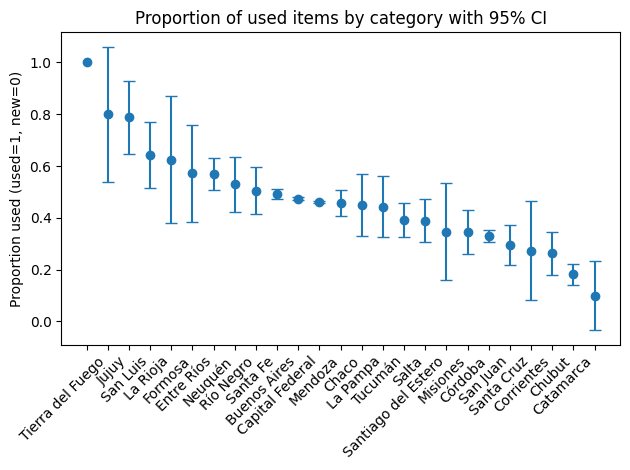

In [ ]:
plot_column_analysis(res)

In [ ]:
likely_to_be_used_by_state = look_for_likely_to_be_used(res, threshold=0.75)
likely_to_be_used_by_state

,n,prop_used,ci_lower,ci_upper
seller_address_state,,,,
Tierra del Fuego,10,0.800000,0.538667,1.061333
Jujuy,33,0.787879,0.646233,0.929524


In [ ]:
likely_to_be_new_by_state = look_for_likely_to_be_new(res, threshold=0.25)
likely_to_be_new_by_state

,n,prop_used,ci_lower,ci_upper
seller_address_state,,,,
Chubut,335,0.18209,0.140701,0.223478
Catamarca,20,0.10000,-0.034896,0.234896


## Seller City

In [10]:
from challenge.dataset.utils import typical_string_processing
X_dataframe["seller_address_city"] = X_dataframe["seller_address_city"].apply(typical_string_processing)
X_dataframe["seller_address_city"].value_counts()

seller_address_city
capital federal                   5805
buenos aires                      5801
caba                              5309
palermo                           3046
caballito                         2710
                                  ... 
beccar, partido de san isidro.       1
paso de rey                          1
embalse                              1
tre de febrero                       1
almafuerte                           1
Name: count, Length: 2367, dtype: int64

In [11]:
X_dataframe["seller_address_city"] = X_dataframe["seller_address_city"].apply(lambda x: x.replace(".", "")).apply(
    lambda x: x.replace("federal", "")
).apply(lambda x: "caba" if x == "ciudad autonoma de buenos aires" else x).apply(
    lambda x: "capital" if x == "bs as" else x
).apply(
    lambda x: "capital" if x == "buenos aires" else x
).apply(
    typical_string_processing
)

In [12]:
print(len(X_dataframe["seller_address_city"].unique()))
relevant_cities = X_dataframe["seller_address_city"].value_counts()[:20].index
X_dataframe["seller_address_city"].value_counts()[:100]

2289


seller_address_city
capital                12780
caba                    6522
palermo                 3046
caballito               2715
belgrano                2113
                       ...  
jose c paz               171
constitucion             167
adrogue                  166
san andres de giles      165
florencio varela         164
Name: count, Length: 100, dtype: int64

#### 💡 Insights  
There are too many distinct seller cities to analyze individually.  
Instead, we will focus on the cities with the **highest frequency of listings** to check for differences in condition distribution.

In [13]:
relevant_cities = X_dataframe["seller_address_city"].value_counts()[:100].index
relevant_cities

Index(['capital', 'caba', 'palermo', 'caballito', 'belgrano', 'rosario',
       'flores', 'villa crespo', 'mataderos', 'lanus', 'almagro', 'avellaneda',
       'balvanera', 'mar del plata', 'la plata', 'cordoba', 'san isidro',
       'general san martin', 'recoleta', 'quilmes', 'floresta',
       'villa urquiza', 'vicente lopez', 'lomas de zamora', 'congreso',
       'moron', 'microcentro', 'ituzaingo', 'san nicolas', 'ramos mejia',
       'san telmo', 'villa devoto', 'boedo', 'martinez', 'nuñez', 'olivos',
       'villa del parque', 'caseros', 'bragado', 'monserrat', 'paternal',
       'once', 'barracas', 'villa pueyrredon', 'tribunales', 'pilar',
       'ciudadela', 'san martin', 'tigre', 'san cristobal', 'hurlingham',
       'ciudad madero', 'colegiales', 'retiro', 'saavedra', 'bahia blanca',
       'merlo', 'castelar', 'liniers', 'munro', 'villa ballester',
       'berazategui', 'san miguel', 'monte grande', 'san justo', 'la matanza',
       'san fernando', 'parque chacabuco', 'tre

In [14]:
res = column_analysis("seller_address_city", X_dataframe.loc[X_dataframe["seller_address_city"].isin(relevant_cities)])
display(res)

,n,prop_used,ci_lower,ci_upper
seller_address_city,,,,
bragado,448,0.988839,0.974143,0.995224
san andres de giles,165,0.969697,0.931032,0.986989
coghlan,179,0.815642,0.752413,0.865609
san antonio de padua,186,0.806452,0.743708,0.856792
la boca,174,0.775862,0.708324,0.831482
...,...,...,...,...
trelew,272,0.147059,0.109890,0.194058
jose c paz,171,0.146199,0.101029,0.206916
mataderos,1412,0.112606,0.097158,0.130157


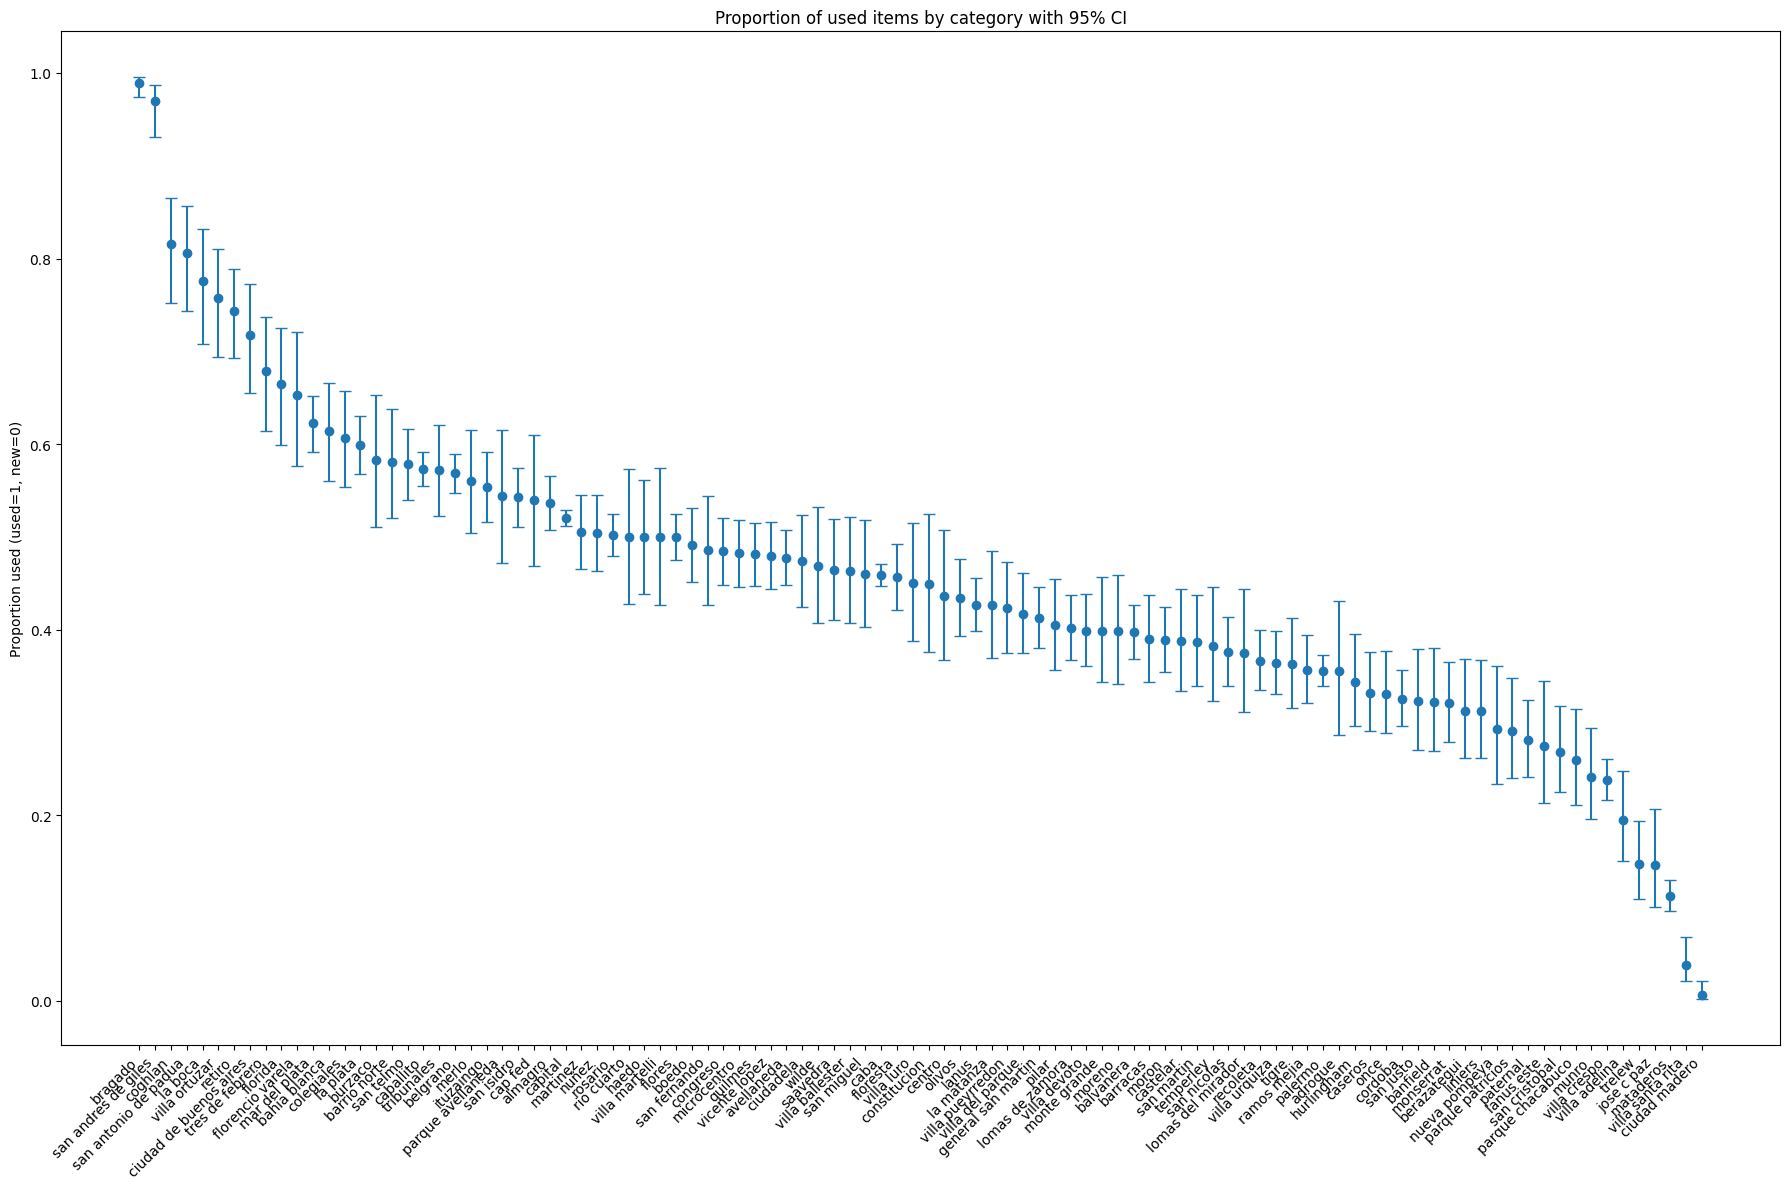

In [15]:
plt.figure(figsize=(18, 12))
plot_column_analysis(res)

In [16]:
likely_to_be_used_by_city = look_for_likely_to_be_used(res, threshold=0.75)
likely_to_be_used_by_city

,n,prop_used,ci_lower,ci_upper
seller_address_city,,,,
bragado,448,0.988839,0.974143,0.995224
san andres de giles,165,0.969697,0.931032,0.986989
coghlan,179,0.815642,0.752413,0.865609
san antonio de padua,186,0.806452,0.743708,0.856792
la boca,174,0.775862,0.708324,0.831482
villa ortuzar,206,0.757282,0.694372,0.810771


In [17]:
likely_to_be_used_by_city.index

Index(['bragado', 'san andres de giles', 'coghlan', 'san antonio de padua',
       'la boca', 'villa ortuzar'],
      dtype='object', name='seller_address_city')

In [18]:
likely_to_be_new_by_city = look_for_likely_to_be_new(res, threshold=0.25)
likely_to_be_new_by_city

,n,prop_used,ci_lower,ci_upper
seller_address_city,,,,
munro,294,0.241497,0.196110,0.293552
villa crespo,1434,0.237796,0.216480,0.260514
villa adelina,252,0.194444,0.150319,0.247746
trelew,272,0.147059,0.109890,0.194058
jose c paz,171,0.146199,0.101029,0.206916
mataderos,1412,0.112606,0.097158,0.130157
villa santa rita,261,0.038314,0.020942,0.069080
ciudad madero,341,0.005865,0.001610,0.021130


In [19]:
likely_to_be_new_by_city.index

Index(['munro', 'villa crespo', 'villa adelina', 'trelew', 'jose c paz',
       'mataderos', 'villa santa rita', 'ciudad madero'],
      dtype='object', name='seller_address_city')

In [20]:
actual_relevant_cities = list(likely_to_be_used_by_city.index) + list(likely_to_be_new_by_city.index)
actual_relevant_cities = list(likely_to_be_used_by_city.index) + list(likely_to_be_new_by_city.index)
X_dataframe["seller_address_city"] = X_dataframe["seller_address_city"].apply(lambda x: x if x in actual_relevant_cities else "other")
X_dataframe["seller_address_city"].value_counts()

seller_address_city
other                   84205
villa crespo             1434
mataderos                1412
bragado                   448
ciudad madero             341
munro                     294
trelew                    272
villa santa rita          261
villa adelina             252
villa ortuzar             206
san antonio de padua      186
coghlan                   179
la boca                   174
jose c paz                171
san andres de giles       165
Name: count, dtype: int64

# Seller ID

In [21]:
X_dataframe["seller_id"].value_counts()[:50]

seller_id
5248662274    850
2015548469    654
7704929703    424
4631246902    408
8612126795    318
2266082781    302
6972484560    259
6846806944    251
4248718919    244
1387735603    240
8326621157    211
7772844348    209
2373910598    208
7694743641    183
3135396608    164
7672071434    163
6538753635    160
2024252139    159
8980863521    155
8918336477    149
5749908984    146
4226059250    146
6537535599    143
7394370231    139
6832522378    138
6029888950    138
4838664540    136
8220549814    136
8435804226    132
2122542660    129
3846095764    128
4755818264    123
8516415845    122
7060837357    122
6645536870    122
5255978862    121
7394214410    117
7835318510    111
3884593281    110
6396603751    109
9840215628    106
4014611326    106
7740664679    105
6884045011    104
7106323686    103
4131433201     99
2898941868     99
2874645086     98
1833552445     98
2810172868     97
Name: count, dtype: int64

#### 💡 Insights  
Because there are many distinct `seller_id` values, analyzing them individually is not practical.  
Instead, we will create a feature indicating whether an item belongs to a **popular seller** or not.

In [22]:
# Check if the seller id is repeated more than 100 times
popular_sellers = X_dataframe["seller_id"].value_counts().loc[lambda x: x > 100].index
X_dataframe["popular_seller"]= X_dataframe["seller_id"].apply(lambda x: x in popular_sellers)
X_dataframe["popular_seller"].value_counts()


popular_seller
False    81197
True      8803
Name: count, dtype: int64

In [23]:
popular_sellers

Index([5248662274, 2015548469, 7704929703, 4631246902, 8612126795, 2266082781,
       6972484560, 6846806944, 4248718919, 1387735603, 8326621157, 7772844348,
       2373910598, 7694743641, 3135396608, 7672071434, 6538753635, 2024252139,
       8980863521, 8918336477, 5749908984, 4226059250, 6537535599, 7394370231,
       6832522378, 6029888950, 4838664540, 8220549814, 8435804226, 2122542660,
       3846095764, 4755818264, 8516415845, 7060837357, 6645536870, 5255978862,
       7394214410, 7835318510, 3884593281, 6396603751, 9840215628, 4014611326,
       7740664679, 6884045011, 7106323686],
      dtype='int64', name='seller_id')

In [24]:
res = column_analysis("seller_id", X_dataframe.loc[X_dataframe["seller_id"].isin(popular_sellers)])
display(res)

,n,prop_used,ci_lower,ci_upper
seller_id,,,,
6645536870,122,1.000000,9.694727e-01,1.000000
3846095764,128,1.000000,9.708620e-01,1.000000
6832522378,138,1.000000,9.729163e-01,1.000000
7394214410,117,1.000000,9.682096e-01,1.000000
4014611326,106,1.000000,9.650260e-01,1.000000
4755818264,123,1.000000,9.697134e-01,1.000000
8918336477,149,1.000000,9.748655e-01,1.000000
2024252139,159,1.000000,9.764090e-01,1.000000
4631246902,408,0.995098,9.823050e-01,0.998655


In [25]:
popular_used_sellers = look_for_likely_to_be_used(res, threshold=0.8)
popular_new_sellers = look_for_likely_to_be_new(res, threshold=0.2)
X_dataframe["seller_id"] = X_dataframe["seller_id"].apply(lambda x: "popular used seller" if x in popular_used_sellers.index else "popular new seller" if x in popular_new_sellers.index else "other")

X_dataframe["seller_id"].value_counts()

seller_id
other                  81466
popular new seller      4437
popular used seller     4097
Name: count, dtype: int64

In [26]:
popular_new_sellers.index

Index([8980863521, 5248662274, 3884593281, 7106323686, 2266082781, 8612126795,
       2373910598, 8435804226, 7835318510, 7060837357, 7772844348, 6396603751,
       7704929703, 2015548469, 6846806944, 7394370231, 1387735603],
      dtype='int64', name='seller_id')

In [28]:
res = column_analysis("seller_id", X_dataframe)
display(res)


,n,prop_used,ci_lower,ci_upper
seller_id,,,,
popular used seller,4097,0.974371,0.969070,0.978784
other,81466,0.461383,0.457961,0.464808
popular new seller,4437,0.015551,0.012307,0.019633


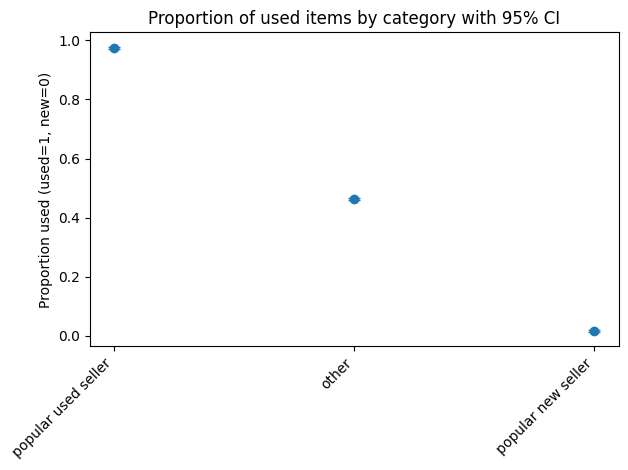

In [29]:
plot_column_analysis(res)